<a href="https://colab.research.google.com/github/abdulxs/Advanced-Deep-Learning-Projects/blob/main/4.%20Batch%20Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aim: Implement Batch Normalization with own CNN model on MNIST dataset, compare the
differences between 'with Batch Normalization' and 'without Batch Normalization'. Then display the classification
error (%) by epoch.

Epoch 1/10
938/938 [==============================] - 96s 100ms/step - loss: 0.1011 - accuracy: 0.9712 - val_loss: 0.0397 - val_accuracy: 0.9877
Epoch 2/10
938/938 [==============================] - 93s 99ms/step - loss: 0.0372 - accuracy: 0.9884 - val_loss: 0.0380 - val_accuracy: 0.9877
Epoch 3/10
938/938 [==============================] - 93s 100ms/step - loss: 0.0255 - accuracy: 0.9918 - val_loss: 0.0559 - val_accuracy: 0.9818
Epoch 4/10
938/938 [==============================] - 93s 99ms/step - loss: 0.0208 - accuracy: 0.9934 - val_loss: 0.0412 - val_accuracy: 0.9870
Epoch 5/10
938/938 [==============================] - 94s 100ms/step - loss: 0.0173 - accuracy: 0.9945 - val_loss: 0.0300 - val_accuracy: 0.9904
Epoch 6/10
938/938 [==============================] - 92s 98ms/step - loss: 0.0139 - accuracy: 0.9955 - val_loss: 0.0316 - val_accuracy: 0.9907
Epoch 7/10
938/938 [==============================] - 90s 96ms/step - loss: 0.0108 - accuracy: 0.9966 - val_loss: 0.0266 - val_accura

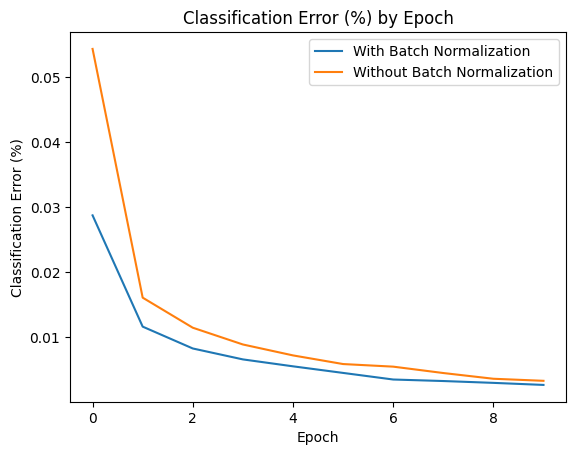

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the CNN architecture with Batch Normalization
def build_cnn_with_batch_norm(activation_function):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation=activation_function, input_shape=(28, 28, 1)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation=activation_function))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation=activation_function))
    model.add(layers.BatchNormalization())
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation=activation_function))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(10, activation='softmax'))

    return model

# Train the model with Batch Normalization
activation_function = 'relu'
model_with_batch_norm = build_cnn_with_batch_norm(activation_function)
model_with_batch_norm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_with_batch_norm = model_with_batch_norm.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels), verbose=1)

# Define the CNN architecture without Batch Normalization
def build_cnn_without_batch_norm(activation_function):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation=activation_function, input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation=activation_function))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation=activation_function))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation=activation_function))
    model.add(layers.Dense(10, activation='softmax'))

    return model

# Train the model without Batch Normalization
model_without_batch_norm = build_cnn_without_batch_norm(activation_function)
model_without_batch_norm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_without_batch_norm = model_without_batch_norm.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels), verbose=1)

# Plot the classification error (%) by epoch for models with and without Batch Normalization
plt.plot(1 - np.array(history_with_batch_norm.history['accuracy']), label='With Batch Normalization')
plt.plot(1 - np.array(history_without_batch_norm.history['accuracy']), label='Without Batch Normalization')
plt.title('Classification Error (%) by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Classification Error (%)')
plt.legend()
plt.show()


It can be observed from the plot that the learning rate converged faster and better with batch normalization than without batch normalization.